# Build PSF model

In [ ]:
# from psfsynth import *
# run_psf_synth_mag_all(1-2, 4-8)

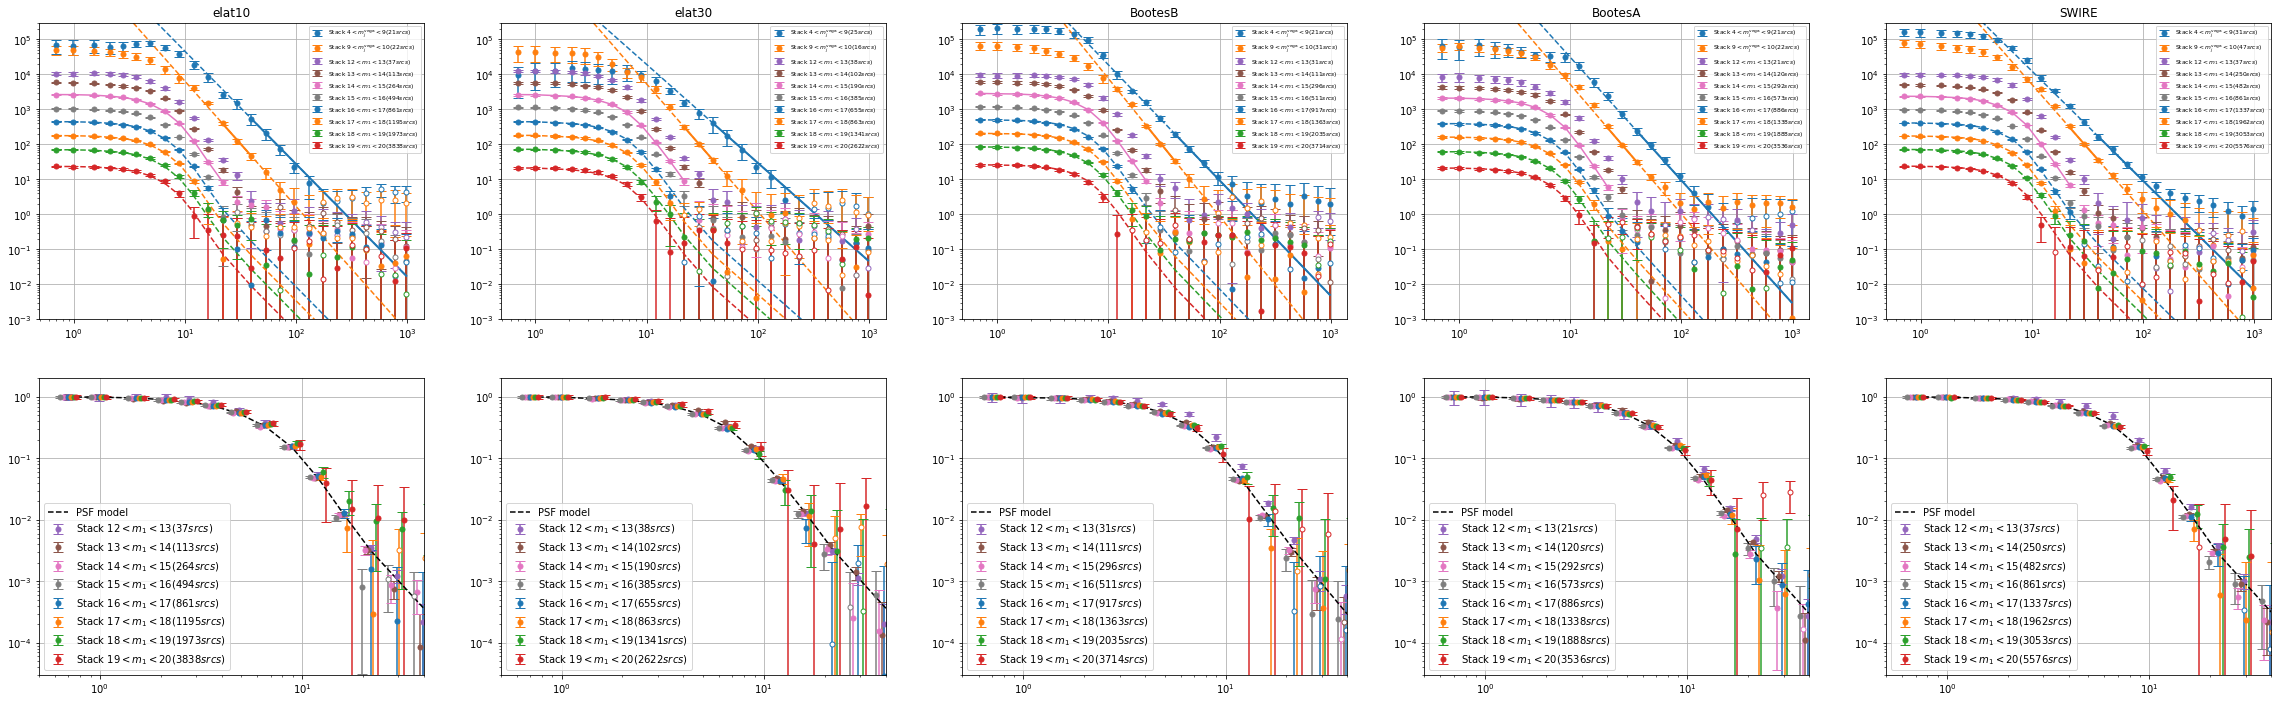

In [43]:
from psfsynth import *

psfmodel ={}
inst = 2
profc = np.zeros(25)
fig, ax = plt.subplots(2, 5, figsize = (40,12))
for i, ifield in enumerate([4,5,6,7,8]):
    for im,(m_min, m_max) in enumerate(zip([4,9], [9,10])):
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_2m_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat = pickle.load(f)
        plot_err_log(profdat['rbins'], 
                     profdat['profcb'],
                     profdat['profcb_err'], plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im),
                     label=r'Stack $%d < m_j^{\rm vega} <%d (%d srcs)$'%(m_min, m_max, profdat['Nsrc']))
        if m_min==4:
            slope_out = np.polyfit(np.log10(profdat['rbins'][11:17]),
                               np.log10(profdat['profcb'][11:17]),1)[0]
            proffit = 10 ** (slope_out * np.log10(profdat['rbins']))
            proffit = proffit/proffit[13]*profdat['profcb'][13]
            ax[0][i].plot(profdat['rbins'], proffit, color='C'+str(im), ls='--')
            ax[0][i].plot(profdat['rbins'][13:], proffit[13:], color='C'+str(im), lw=2)
            profc[13:] = proffit[13:]
        if m_min == 9:
            slope_mid = np.polyfit(np.log10(profdat['rbins'][11:15]),
                               np.log10(profdat['profcb'][11:15]),1)[0]
            proffit = 10 ** (slope_mid * np.log10(profdat['rbins']))
            proffit = proffit/proffit[13]*profdat['profcb'][13]
            ax[0][i].plot(profdat['rbins'], proffit, color='C'+str(im), ls='--')
            ax[0][i].plot(profdat['rbins'][11:14], proffit[11:14], color='C'+str(im), lw=2)
            profc[11:14] = proffit[11:14] / proffit[13] * profc[13]
            
    for im,(m_min, m_max) in enumerate(zip([12,13,14,15], [13,14,15,16])):
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_ps_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat = pickle.load(f)
        plot_err_log(profdat['rbins'], 
                     profdat['profcb'],
                     profdat['profcb_err'], plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im+4), 
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max, profdat['Nsrc']))
        plot_err_log(profdat['rbins']*(1-im*0.03), 
                     profdat['profcb']/profdat['profcb'][0],
                     profdat['profcb_err']/profdat['profcb'][0],
                     ax=ax[1][i], color='C'+str(im+4), plot_xerr=False,
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat['Nsrc']))
        if inst ==1 and ifield==4:
            if m_min==14:
                ax[0][i].plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C'+str(im+4))
                profc[:12] = profdat['profcb'][:12] / profdat['profcb'][11] * profc[11]
        elif inst==1:
            if m_min==13:
                ax[0][i].plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C'+str(im+4))
                profc[:12] = profdat['profcb'][:12] / profdat['profcb'][11] * profc[11]            
        elif inst == 2:
            if m_min==14:
                ax[0][i].plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C'+str(im+4))
                profc[:12] = profdat['profcb'][:12] / profdat['profcb'][11] * profc[11]         
            
    profc /= profc[0]
    psfmodel[ifield] = profc
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) + \
    '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        plot_err_log(profdat['rbins'], 
                     profdat[im]['profcb'],
                     profdat[im]['profcb_err'],plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im),
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max, profdat[im]['Nsrc']))
        plot_err_log(profdat['rbins']*(1+im*0.03), 
                     profdat[im]['profcb']/profdat[im]['profcb'][0],
                     profdat[im]['profcb_err']/profdat[im]['profcb'][0],
                     ax=ax[1][i], color='C'+str(im), plot_xerr=False,
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat[im]['Nsrc']))
        
        ax[0][i].loglog(profdat['rbins'], profc*profdat[im]['profcb'][0],color='C'+str(im),ls='--')
    ax[1][i].loglog(profdat['rbins'], profc,color='k',ls='--', label='PSF model')
        
    ax[0][i].set_title(fieldnamedict[ifield])
    ax[0][i].legend(fontsize=6)
    ax[0][i].set_ylim([1e-3,3e5])
    ax[1][i].legend()
    ax[0][i].grid()
    ax[1][i].grid()
    ax[1][i].set_ylim([3e-5,2])
    ax[1][i].set_xlim([5e-1,40])
#     plt.savefig('/Users/ytcheng/Desktop/star_stack.png', dpi = 100, bbox_inches='tight')

# Gaia
Gaia astrometry uncertainty ~ 0.1-1 mas https://gea.esac.esa.int/archive/documentation/GDR2/

PanSTARRS astrometry uncertainty ~ 2 mas https://arxiv.org/pdf/1612.05560.pdf (Sec.5.1)

CIBER subpixel = 0.7 arcsec = 700 mas

In [191]:
# process Gaia raw data

# from utils import *
# for ifield in [4,5,6,7,8]:
#     catdir = '/Users/ytcheng/ciber/doc/20170617_Stacking/maps/gaiacats/'
#     catcoorddir = '/Users/ytcheng/ciber/doc/20170617_Stacking/maps/catcoord/'

#     df = pd.read_csv(catdir + fieldnamedict[ifield] + '.csv')
#     df = catalog_add_xy_from_radec(fieldnamedict[ifield], df)
#     df = df[['ra','dec','x1', 'y1', 'x2', 'y2','parallax','phot_g_mean_mag']].copy()
#     fname = catcoorddir + 'GAIA/' + fieldnamedict[ifield] + '.csv'
#     df.to_csv(fname, index=False)

In [ ]:
# run Gaia star stack

# from psfsynth import * 
# run_psf_synth_mag_all_gaia(1-2, 4-8, np.arange(11,19), np.arange(12,20))
# run_psf_synth_mag_all_gaia(1-2, 4-8, [19], [20])
# run_psf_synth_mag_all_gaia(1-2, 4-8, [20], [21])

## Gaia star stack & building systematic error

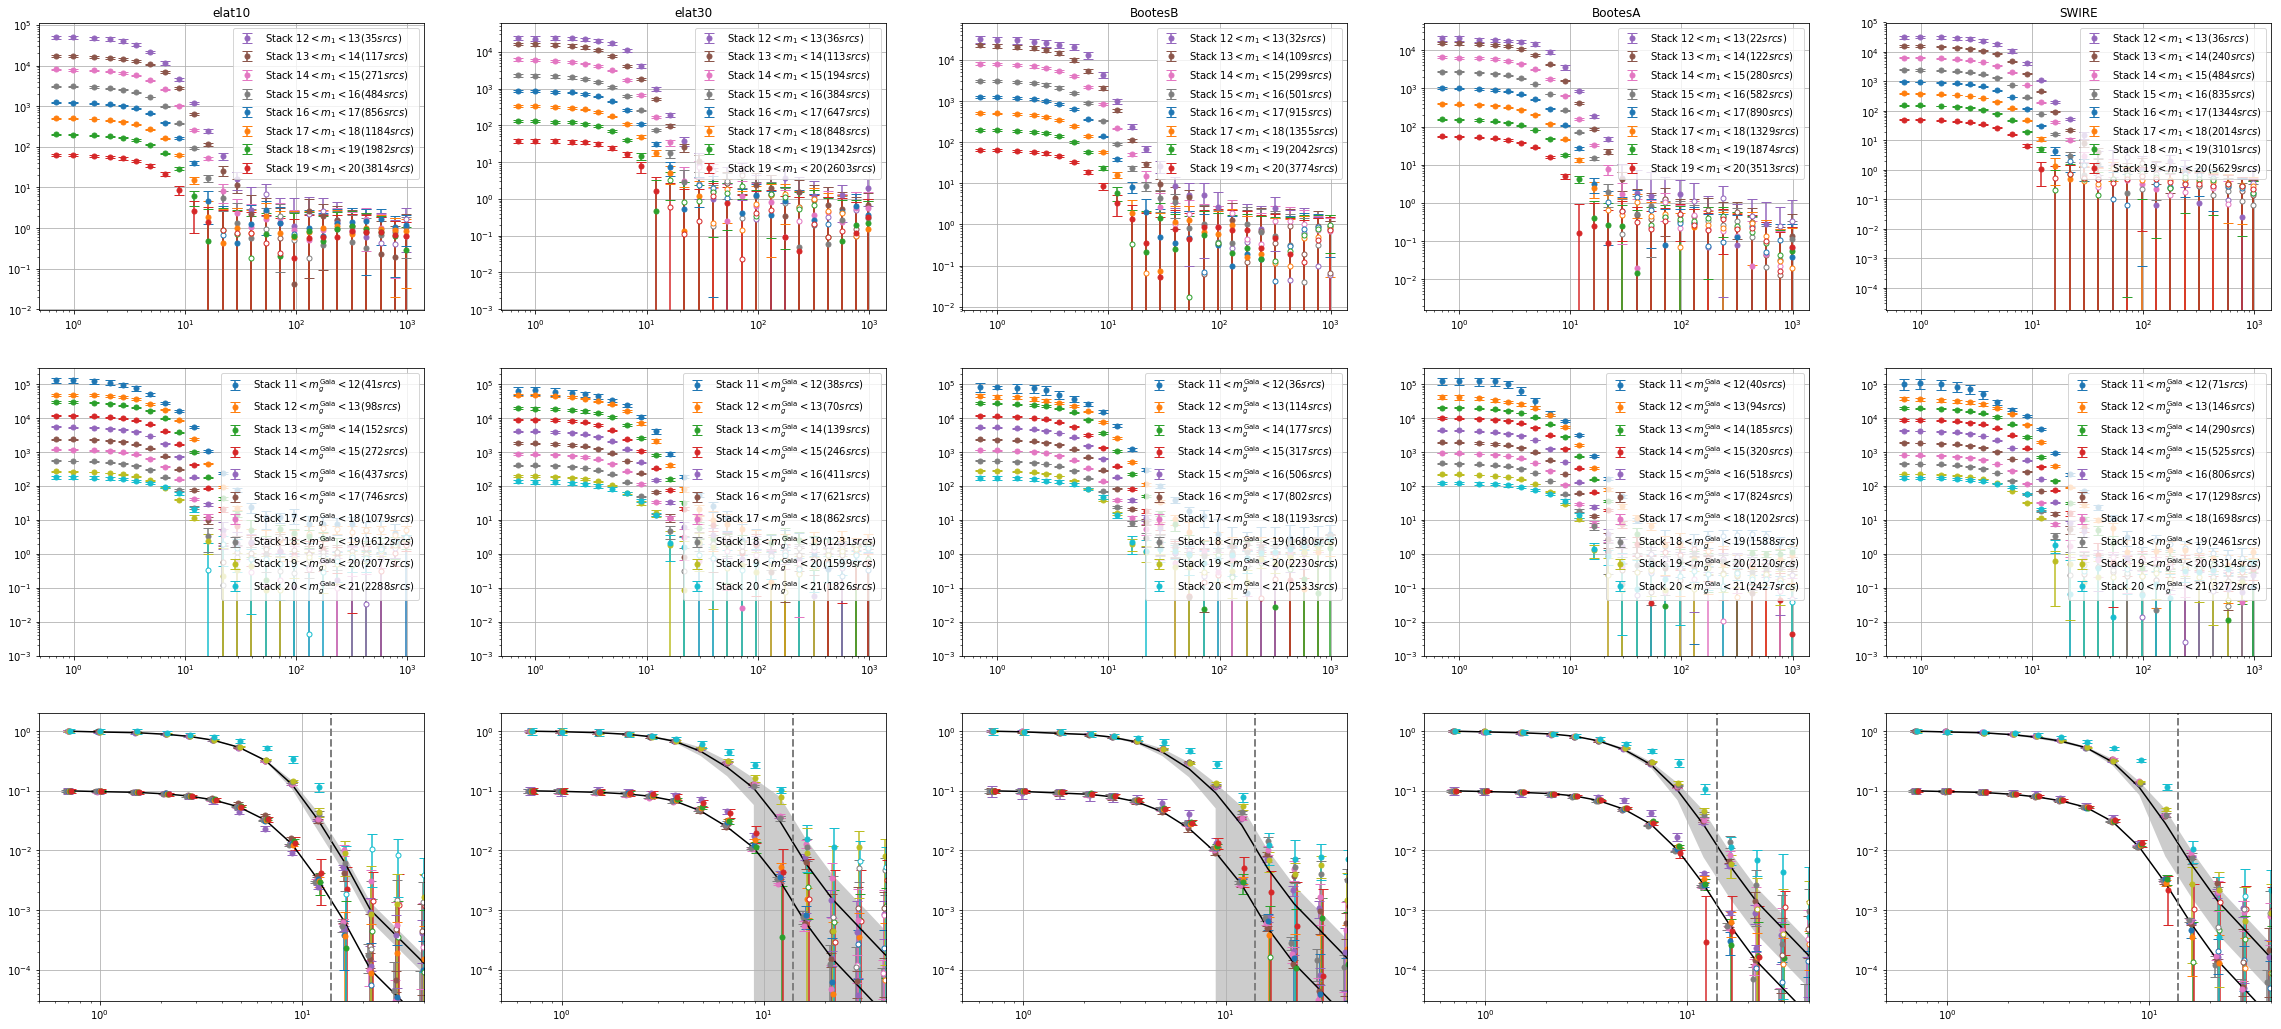

In [24]:
from psfsynth import *

inst = 1
fig, ax = plt.subplots(3, 5, figsize = (40,18))
for i, ifield in enumerate([4,5,6,7,8]):
    for im,(m_min, m_max) in enumerate(zip([12,13,14,15], [13,14,15,16])):
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_ps_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat = pickle.load(f)
        plot_err_log(profdat['rbins'], 
                     profdat['profcb'],
                     profdat['profcb_err'], plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im+4), 
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max, profdat['Nsrc']))
        plot_err_log(profdat['rbins']*(1-im*0.01), 
                     profdat['profcb']/profdat['profcb'][0]/10,
                     profdat['profcb_err']/profdat['profcb'][0]/10,
                     ax=ax[2][i], color='C'+str(im+4), plot_xerr=False,
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat['Nsrc']))

    fname = mypaths['alldat'] + 'TM'+ str(inst) + \
    '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        plot_err_log(profdat['rbins'], 
                     profdat[im]['profcb'],
                     profdat[im]['profcb_err'],plot_xerr=False,
                     ax=ax[0][i], color='C'+str(im),
                     label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max, profdat[im]['Nsrc']))
        if m_min >= 14:
            plot_err_log(profdat['rbins']*(1+im*0.01), 
                         profdat[im]['profcb']/profdat[im]['profcb'][0]/10,
                         profdat[im]['profcb_err']/profdat[im]['profcb'][0]/10,
                         ax=ax[2][i], color='C'+str(im), plot_xerr=False,
                         label=r'Stack $%d < m_1 <%d (%d srcs)$'%(m_min, m_max,profdat[im]['Nsrc']))
        
    
    for im,(m_min, m_max) in enumerate(zip(np.arange(11,21), np.arange(12,22))):
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_gaia_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
        with open(fname, "rb") as f:
            profdat = pickle.load(f)
        plot_err_log(profdat['rbins'], 
                     profdat['profcb'],
                     profdat['profcb_err'], plot_xerr=False,
                     ax=ax[1][i], color='C'+str(im),
                     label=r'Stack $%d < m_g^{\rm Gaia} <%d (%d srcs)$'%(m_min, m_max, profdat['Nsrc']))
        if m_min >= 15:
            plot_err_log(profdat['rbins']*(0.97+im*0.005), 
                         profdat['profcb']/profdat['profcb'][0],
                         profdat['profcb_err']/profdat['profcb'][0],
                         ax=ax[2][i], color='C'+str(im), plot_xerr=False,
                         label=r'Stack $%d < m_g^{\rm Gaia} <%d (%d srcs)$'%(m_min, m_max,profdat['Nsrc']))

    profdat = run_psf_combine(inst, ifield, savedata=False)
    psf = profdat[0]['comb']['profcb']
    psf_err = profdat[0]['comb']['profcb_err_gaia_sys']
    ax[2][i].loglog(profdat['rbins'], psf, 'k-',label='PSF model')
    ax[2][i].loglog(profdat['rbins'], psf/10, 'k-')
    ax[2][i].fill_between(profdat['rbins'], psf - psf_err, psf + psf_err,
                       facecolor='k', alpha=0.2,label='PSF Gaia uncertainties')
    ax[2][i].axvline(np.sqrt(profdat['rbins'][9]*profdat['rbins'][10]),c='grey', lw=2, ls='--')
    ax[0][i].set_title(fieldnamedict[ifield])
    ax[1][i].legend(fontsize=6)
    ax[1][i].set_ylim([1e-3,3e5])
    ax[0][i].legend(loc=1)
    ax[1][i].legend(loc=1)
    ax[0][i].grid()
    ax[1][i].grid()
    ax[2][i].grid()
    ax[2][i].set_ylim([3e-5,2])
    ax[2][i].set_xlim([5e-1,40])
    plt.savefig('/Users/ytcheng/Desktop/gaia_stack_TM%d.png'%inst, dpi = 100, bbox_inches='tight')

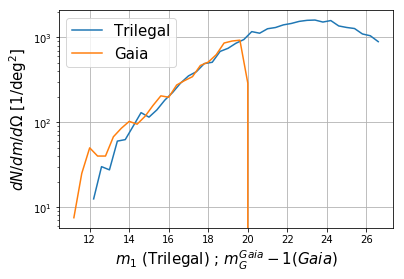

In [23]:
# Trilegal vs Gaia counts

ifield = 4
df = pd.read_csv('/Users/ytcheng/ciber/doc/20170617_Stacking/maps/trilegal/%s.csv'%fieldnamedict[ifield])
df = df[(df['x']>0) & (df['x']<512) & (df['y']>0) & (df['y']<512)]
mbinedges = np.arange(12,27,0.4)
mbins = (mbinedges[1:] + mbinedges[:-1]) / 2
dm = mbinedges[1] - mbinedges[0]
N = np.histogram(df['I'],bins=mbinedges)[0]
plt.semilogy(mbins, N/dm, label='Trilegal')

df = pd.read_csv(mypaths['GAIAcatdat'] + fieldnamedict[ifield] + '.csv')
df = df[(df['x1']>0) & (df['x1']<512) & (df['y1']>0) & (df['y1']<512)]
df = df[df['parallax']==df['parallax']]
N = np.histogram(df['phot_g_mean_mag'],bins=mbinedges)[0]
plt.semilogy(mbins-1, N/dm, label='Gaia')

plt.xlabel('$m_1$ (Trilegal) ; $m_G^{Gaia}-1 (Gaia)$',fontsize=15)
plt.ylabel(r'$dN/dm/d\Omega$ [1/deg$^2$]',fontsize=15)
plt.grid()
plt.legend(fontsize=15)

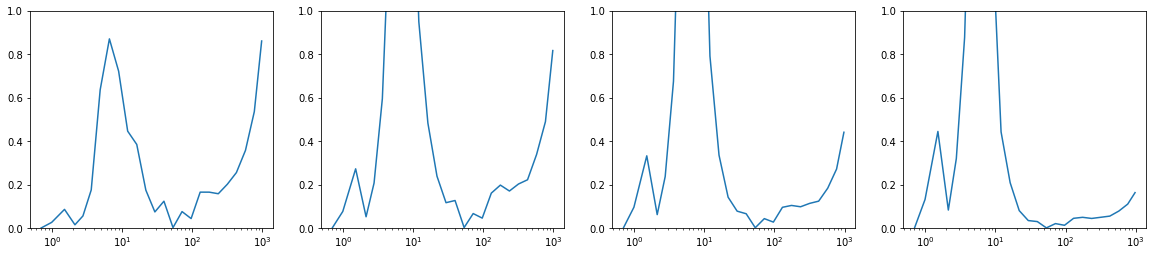

In [36]:
from psfsynth import *

inst = 1
filt_order = filt_order_dict[inst]
ifield = 6

fig, ax = plt.subplots(1, 4, figsize = (20,4))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    psfdat = run_psf_combine(inst, ifield, savedata=False)
    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat
    errg = np.sqrt(np.diag(stackdat['cov']['profcb'])) / stackdat['profcb'][0]
    
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d.pkl'%(fieldnamedict[ifield],16,17)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    psfdat[im]['comb']['profcb']
    errpsf = np.abs(profdat['profcb']/profdat['profcb'][0] - psfdat[im]['comb']['profcb'])

    ax[im].semilogx(profdat['rbins'],errpsf/errg)
    ax[im].set_ylim([0,1])

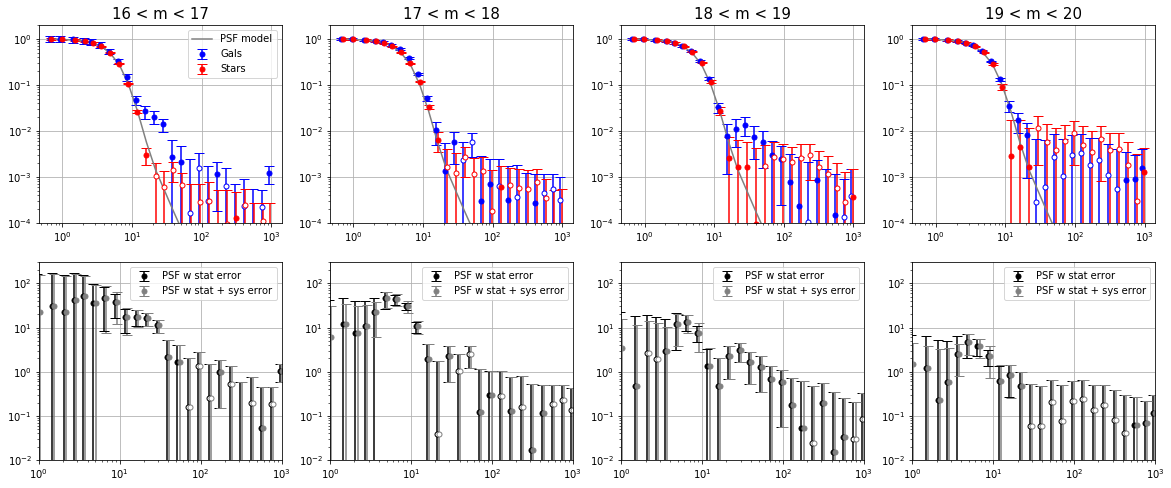

In [28]:
from psfsynth import *

inst = 1
filt_order = filt_order_dict[inst]
ifield = 7

fig, ax = plt.subplots(2, 4, figsize = (20,8))
for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

    stackdat = stacking(inst, ifield, m_min, m_max, filt_order=filt_order,
                load_from_file=True, BGsub=False).stackdat

    plot_err_log(stackdat['rbins']*0.95, 
                 stackdat['profcb']/stackdat['profcb'][0],
                 np.sqrt(np.diag(stackdat['cov']['profcb']))/stackdat['profcb'][0],
                 ax=ax[0][im], color='b', plot_xerr=False,
                 label=r'Gals')
    
    profdat = run_psf_combine(inst, ifield, savedata=False)
    plot_err_log(profdat['rbins'], 
                 profdat[im]['profcb']/profdat[im]['profcb'][0],
                 profdat[im]['profcb_err']/profdat[im]['profcb'][0],
                 ax=ax[0][im], plot_xerr=False, color='r',label=r'Stars')

    ax[0][im].loglog(profdat['rbins'], 
                  profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0], 
                  'grey',label='PSF model')

    ex = stackdat['profcb'] \
    - profdat[im]['comb']['profcb'] * stackdat['profcb'][0]
    errg = np.sqrt(np.diag(stackdat['cov']['profcb']))
    errpsf = profdat[im]['comb']['profcb_err'] * stackdat['profcb'][0]
    ex_err = np.sqrt(errg**2 + errpsf**2)
    plot_err_log(profdat['rbins']*0.97, 
                 ex,
                 ex_err,
                 ax=ax[1][im], plot_xerr=False, color='k', label='PSF w stat error')

    ex = stackdat['profcb'] \
    - profdat[im]['comb']['profcb']/profdat[im]['comb']['profcb'][0] * stackdat['profcb'][0] 
    errg = np.sqrt(np.diag(stackdat['cov']['profcb']))
    errpsf = profdat[im]['comb']['profcb_err_gaia_sys'] * stackdat['profcb'][0]
    ex_err1 = np.sqrt(errg**2 + errpsf**2)
    plot_err_log(profdat['rbins']*1.03, 
                 ex,
                 ex_err1,
                 ax=ax[1][im], plot_xerr=False, color='grey', 
                 label='PSF w stat + sys error')
    
    ax[0][im].set_ylim([1e-4, 2])
    ax[0][im].grid()
    ax[0][im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
    ax[1][im].set_ylim([1e-2,3e2])
    ax[1][im].set_xlim([1e0,1e3])
    ax[1][im].grid()
    ax[1][im].legend()
ax[0][0].legend()

# plt.savefig('/Users/ytcheng/Desktop/excess.png', dpi = 100, bbox_inches='tight')

# RLD PSF model

band 1 PSF beta model params:

4: (1.755e+00, 5.694e+00, 7.851e-03),
5: (1.542e+00, 4.619e+00, 9.598e-03),
6: (1.525e+00, 4.299e+00, 1.086e-02),
7: (1.529e+00, 4.422e+00, 1.031e-02),
8: (1.593e+00, 4.781e+00, 9.477e-03)

band 2 PSF beta model params:

4: (1.478e+00, 5.284e+00, 6.797e-03),
5: (1.393e+00, 4.835e+00, 7.271e-03),
6: (1.475e+00, 5.181e+00, 7.045e-03),
7: (1.517e+00, 5.342e+00, 6.967e-03),
8: (1.504e+00, 5.282e+00, 7.024e-03)



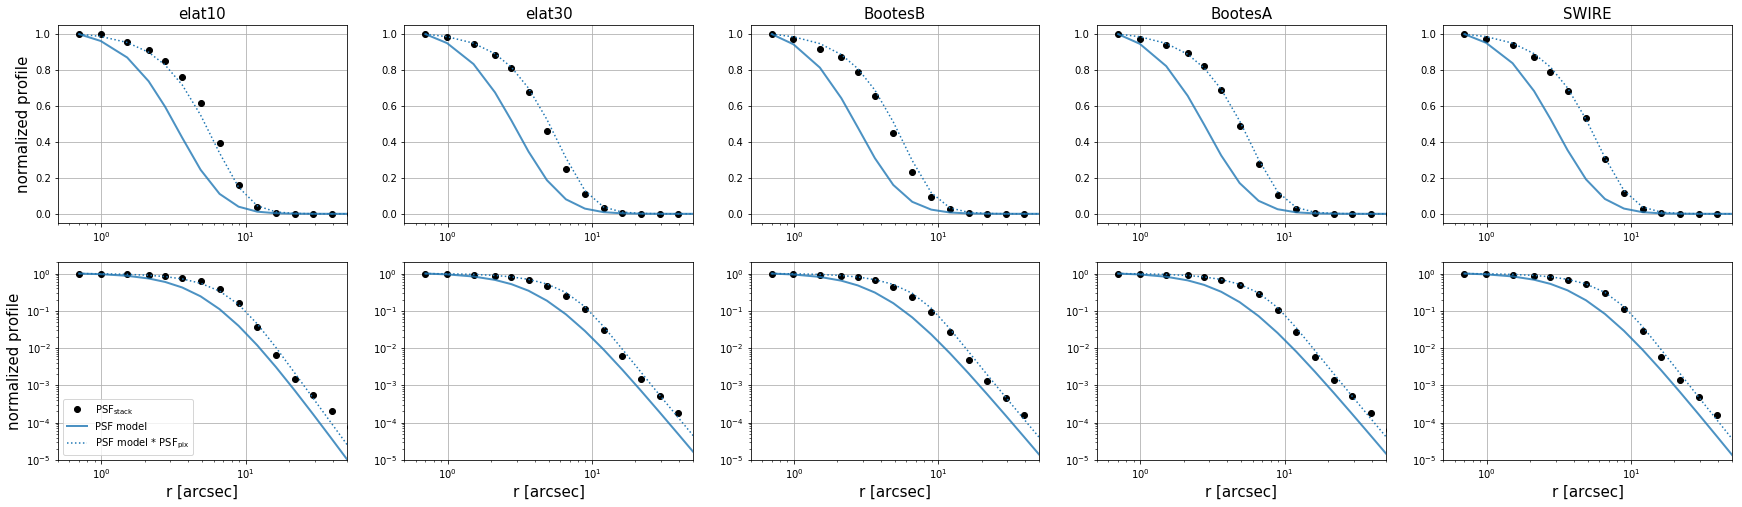

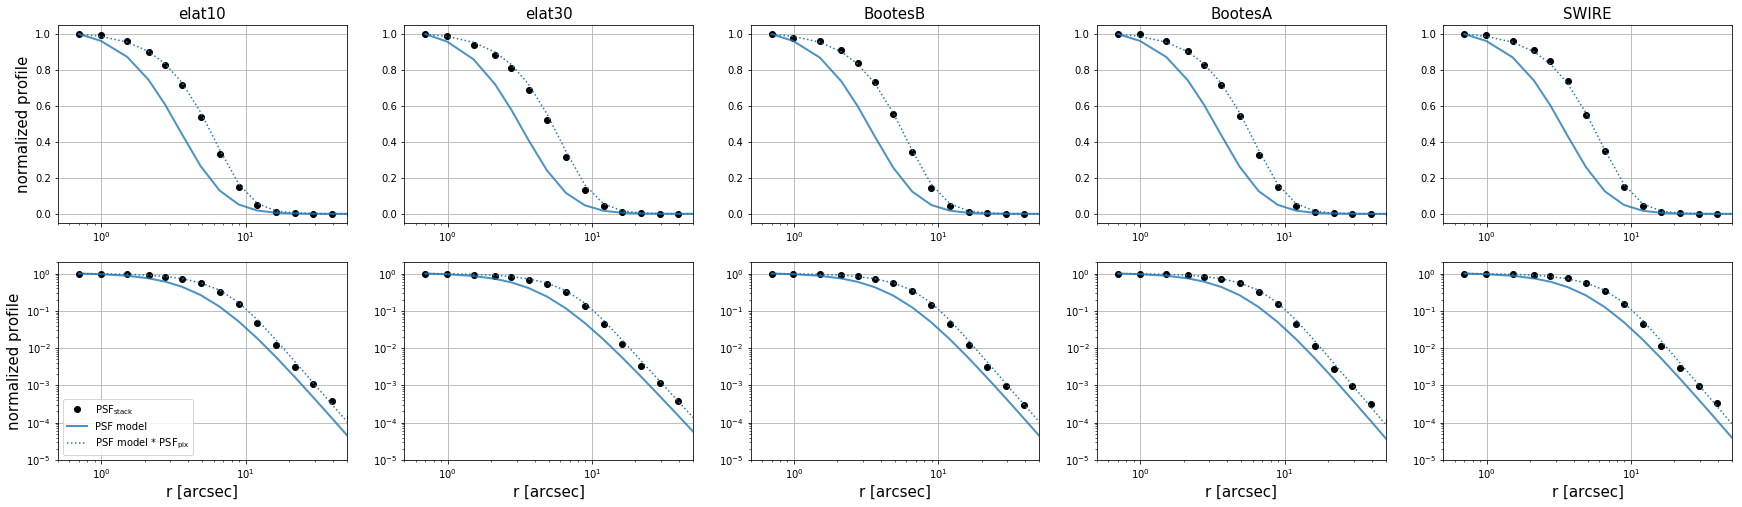

In [1]:
from psfsynth import *
from scipy.optimize import curve_fit

dx = 1200
def beta_function(r, beta, rc, norm):
    return norm * (1 + (r / rc)**2)**(-3.*beta/2)

for inst in [1,2]:
    print('band %d PSF beta model params:\n'%inst)
    pix_map = pix_func_substack()

    fig, ax = plt.subplots(2,5,figsize=(30,8))
    
    for i,ifield in enumerate([4,5,6,7,8]):
        
        fname = mypaths['alldat'] + 'TM'+ str(inst) +\
         '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
        with open(fname,"rb") as f:
            profdat = pickle.load(f)
            
        radmap = make_radius_map(np.zeros([2*dx+1, 2*dx+1]),dx, dx)*0.7
        stackmap = psf_comb_interpolate(inst, ifield, 0, radmap)
        
        rbins = profdat['rbins']
        psf_map = restoration.richardson_lucy\
        (stackmap/np.sum(stackmap), pix_map, 10)
        psfprof = radial_prof(psf_map)['prof']

        (beta, rc, norm), _ = curve_fit(beta_function, rbins[rbins < 30]
                            ,psfprof[rbins < 30]/psfprof[0], sigma=psfprof[rbins < 30])
        psfprofbeta = beta_function(rbins, beta, rc, norm)

        psf_map_beta = beta_function(radmap, beta, rc, norm)
        norm = norm / np.sum(psf_map_beta)
        psf_map_conv = fftconvolve(psf_map_beta, pix_map, 'same')
        psfprofconv = radial_prof(psf_map_conv)['prof']
    
        print('%d: (%.3e, %.3e, %.3e)'%(ifield ,beta, rc, norm), end='')
        if ifield!=8:
            print(',\n', end='')
        else:
            print('\n\n', end='')
         
        ax[0][i].semilogx(rbins,profdat[0]['comb']['profcb']/profdat[0]['comb']['profcb'][0],
                          'o',lw=2,c='k')
        ax[0][i].semilogx(rbins,psfprofbeta/psfprofbeta[0],'-',lw=2,alpha=0.8,c='C0')
        ax[0][i].semilogx(rbins,psfprofconv/psfprofconv[0],':',c='C0')

        ax[1][i].semilogx(rbins,profdat[0]['comb']['profcb']/profdat[0]['comb']['profcb'][0],
                          'o',lw=2,c='k', label=r'PSF$_{\rm stack}$')
        ax[1][i].semilogx(rbins,psfprofbeta/psfprofbeta[0],
                       lw=2,alpha=0.8,c='C0', label='PSF model')
        ax[1][i].semilogx(rbins,psfprofconv/psfprofconv[0],':',c='C0', label=r'PSF model * PSF$_{\rm pix}$')

        ax[1][i].set_yscale('log')
        ax[0][i].set_xlim([5e-1,50])
        ax[1][i].set_xlim([5e-1,50])
        ax[1][i].set_ylim([1e-5,2])
        ax[0][i].set_title(fieldnamedict[ifield], fontsize=15)
        ax[0][i].grid()
        ax[1][i].grid()
        ax[1][i].set_xlabel('r [arcsec]', fontsize=15)
    ax[0][0].set_ylabel('normalized profile', fontsize=15)
    ax[1][0].set_ylabel('normalized profile', fontsize=15)
    ax[1][0].legend(fontsize=10)
#     plt.savefig('plots/paperfig/psf_rec_TM%d.png'%(inst), dpi = 200, bbox_inches='tight')

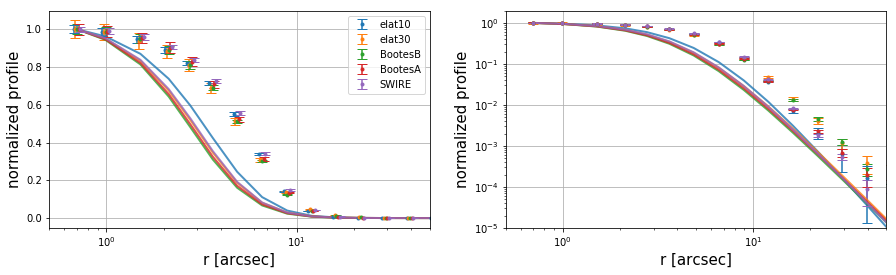

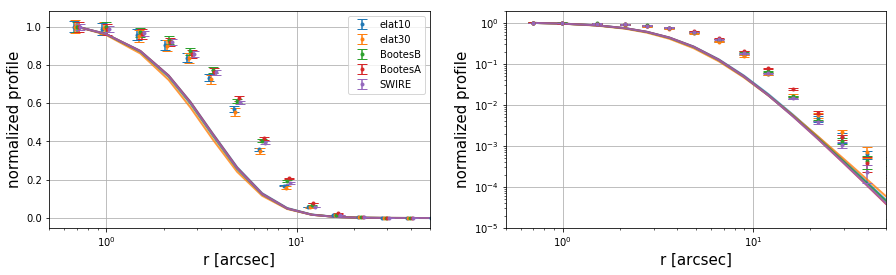

In [1]:
from utils import *

def beta_function(r, beta, rc, norm):
    return norm * (1 + (r / rc)**2)**(-3.*beta/2)
for inst in [1,2]:
    fname = mypaths['alldat'] + 'TM'+ str(inst) + '/psfdata.pkl'
    with open(fname,"rb") as f:
        psfdata = pickle.load(f)

    fig, ax = plt.subplots(1,2,figsize=(15,4))
    for ifield in [4,5,6,7,8]:
        rbins = psfdata[ifield]['rbins']

        beta, rc, norm = PSF_model_dict[inst][ifield]
        psfprofbeta = beta_function(rbins, beta, rc, norm)

        ax[0].errorbar(rbins*(1+(ifield-6)*0.02),
                     psfdata[ifield]['prof']/psfdata[ifield]['prof'][0],
                     psfdata[ifield]['prof_err']/psfdata[ifield]['prof'][0],
                     c='C'+str(ifield-4),fmt ='.', capsize=5, label=fieldnamedict[ifield])
        ax[0].semilogx(rbins,psfprofbeta/psfprofbeta[0],'-',lw=2,alpha=0.8,c='C'+str(ifield-4))

        ax[1].errorbar(rbins,
                     psfdata[ifield]['prof']/psfdata[ifield]['prof'][0],
                     psfdata[ifield]['prof_err']/psfdata[ifield]['prof'][0],
                     c='C'+str(ifield-4),fmt ='.', capsize=5, label='star stack')
        ax[1].semilogx(rbins,psfprofbeta/psfprofbeta[0],
                       lw=2,alpha=0.8,c='C'+str(ifield-4))

    ax[1].set_yscale('log')
    ax[0].set_xlim([5e-1,50])
    ax[1].set_xlim([5e-1,50])
    ax[1].set_ylim([1e-5,2])
    ax[0].grid()
    ax[1].grid()
    ax[0].set_xlabel('r [arcsec]', fontsize=15)
    ax[1].set_xlabel('r [arcsec]', fontsize=15)
    ax[0].set_ylabel('normalized profile', fontsize=15)
    ax[1].set_ylabel('normalized profile', fontsize=15)
    ax[0].legend(fontsize=10)
#     plt.savefig('plots/paperfig/psf_TM%d.pdf'%(inst), dpi = 200, bbox_inches='tight')

# Paper Fig

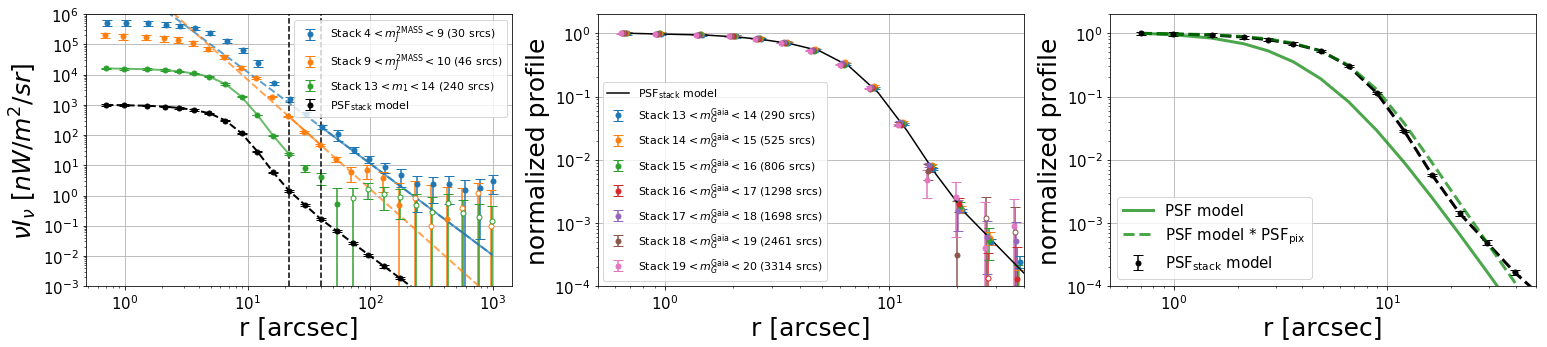

In [27]:
from psfsynth import *
fig, ax = plt.subplots(1,3,figsize=(26,5))

inst = 1
ifield = 8
m_min, m_max = 4,9
fname = mypaths['alldat'] + 'TM'+ str(inst) +\
 '/psfdata_synth_2m_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
with open(fname, "rb") as f:
    profdat = pickle.load(f)
plot_err_log(profdat['rbins']*1.02, 
             profdat['profcb'],
             profdat['profcb_err'], plot_xerr=False,
             ax=ax[0], color='C0',
             label=r'Stack $%d < m_J^{\rm 2MASS} <%d$ (%d srcs)'%(m_min, m_max, profdat['Nsrc']))
slope_out = np.polyfit(np.log10(profdat['rbins'][11:17]),
                   np.log10(profdat['profcb'][11:17]),1)[0]
proffit = 10 ** (slope_out * np.log10(profdat['rbins']))
proffit = proffit/proffit[13]*profdat['profcb'][13]
ax[0].plot(profdat['rbins'], proffit, color='C0', ls='--', lw=2, alpha=0.7)
ax[0].plot(profdat['rbins'][13:], proffit[13:], color='C0', lw=2, alpha=0.7)

m_min, m_max = 9,10
fname = mypaths['alldat'] + 'TM'+ str(inst) +\
 '/psfdata_synth_2m_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
with open(fname, "rb") as f:
    profdat = pickle.load(f)
plot_err_log(profdat['rbins']*0.98, 
             profdat['profcb'],
             profdat['profcb_err'], plot_xerr=False,
             ax=ax[0], color='C1',
             label=r'Stack $%d < m_J^{\rm 2MASS} <%d$ (%d srcs)'%(m_min, m_max, profdat['Nsrc']))
slope_mid = np.polyfit(np.log10(profdat['rbins'][11:15]),
                    np.log10(profdat['profcb'][11:15]),1)[0]
proffit = 10 ** (slope_mid * np.log10(profdat['rbins']))
proffit = proffit/proffit[13]*profdat['profcb'][13]
ax[0].plot(profdat['rbins'], proffit, color='C1', ls='--',lw=2, alpha=0.7)
ax[0].plot(profdat['rbins'][11:14], proffit[11:14], color='C1', lw=2, alpha=0.7)

m_min, m_max = 13, 14
fname = mypaths['alldat'] + 'TM'+ str(inst) +\
 '/psfdata_synth_ps_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
with open(fname, "rb") as f:
    profdat = pickle.load(f)
plot_err_log(profdat['rbins'], 
             profdat['profcb'],
             profdat['profcb_err'], plot_xerr=False,
             ax=ax[0], color='C2', 
             label=r'Stack $%d < m_1 <%d$ (%d srcs)'%(m_min, m_max, profdat['Nsrc']))
ax[0].plot(profdat['rbins'][:12], profdat['profcb'][:12], color='C2', lw=2, alpha=0.7)

fname = mypaths['alldat'] + 'TM'+ str(inst) +\
 '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
with open(fname,"rb") as f:
    profdat = pickle.load(f)
plot_err_log(profdat['rbins'], 
             profdat[0]['comb']['profcb']*1e3,
             profdat[0]['comb']['profcb_err_stat']*1e3, plot_xerr=False,
             ax=ax[0], color='k',label=r'PSF$_{\rm stack}$ model')
ax[0].loglog(profdat['rbins'], profdat[0]['comb']['profcb']*1e3,'k--', lw=2)

ax[0].axvline(profdat['rbins'][11],c='k',ls='--')
ax[0].axvline(profdat['rbins'][13],c='k',ls='--')
ax[0].set_xlabel('r [arcsec]',fontsize=25)
ax[0].set_ylabel(r'$\nu I_\nu$ [$nW/m^2/sr$]',fontsize=25)
ax[0].legend(fontsize=11,loc=1)
ax[0].set_ylim([1e-3,1e6])
ax[0].tick_params(labelsize=15)
ax[0].grid()

for im,(m_min, m_max) in enumerate(zip(np.arange(13,20), np.arange(14,21))):
    fname = mypaths['alldat'] + 'TM'+ str(inst) +\
     '/psfdata_synth_gaia_%s_%d_%d.pkl'%(fieldnamedict[ifield],m_min, m_max)
    with open(fname, "rb") as f:
        profdat = pickle.load(f)
    plot_err_log(profdat['rbins']*(0.97-im*0.01), 
                 profdat['profcb']/profdat['profcb'][0],
                 profdat['profcb_err']/profdat['profcb'][0],
                 ax=ax[1], color='C'+str(im), plot_xerr=False,
                 label=r'Stack $%d < m_G^{\rm Gaia} <%d$ (%d srcs)'%(m_min, m_max,profdat['Nsrc']))

profdat = run_psf_combine(inst, ifield, savedata=False)
psf = profdat[0]['comb']['profcb']
psf_err = profdat[0]['comb']['profcb_err']
ax[1].loglog(profdat['rbins'], psf, 'k-',label=r'PSF$_{\rm stack}$ model')

ax[1].grid()
ax[1].legend(fontsize=11)
ax[1].set_ylim([1e-4,2])
ax[1].set_xlim([5e-1,40])
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('r [arcsec]', fontsize=25)
ax[1].set_ylabel('normalized profile', fontsize=25)

fname = mypaths['alldat'] + 'TM'+ str(inst) +\
 '/psfdata_synth_%s.pkl'%(fieldnamedict[ifield])
with open(fname,"rb") as f:
    profdat = pickle.load(f)
beta, rc, norm = PSF_model_dict[inst][ifield]
def beta_function(r, beta, rc, norm):
    return norm * (1 + (r / rc)**2)**(-3.*beta/2)
psfprofbeta = beta_function(profdat['rbins'], beta, rc, norm)
dx=1200
radmap = make_radius_map(np.zeros([2*dx+1, 2*dx+1]),dx, dx)*0.7
psf_map_beta = beta_function(radmap, beta, rc, norm)
norm = norm / np.sum(psf_map_beta)
pix_map = pix_func_substack()
psf_map_conv = fftconvolve(psf_map_beta, pix_map, 'same')
psfprofconv = radial_prof(psf_map_conv)['prof']

plot_err_log(profdat['rbins'], 
             profdat[0]['comb']['profcb'],
             profdat[0]['comb']['profcb_err_stat'], plot_xerr=False,
             ax=ax[2], color='k',label=r'PSF$_{\rm stack}$ model')
ax[2].loglog(profdat['rbins'], profdat[0]['comb']['profcb'],'k--', lw=3)
ax[2].loglog(profdat['rbins'],psfprofbeta/psfprofbeta[0],
               lw=3,alpha=0.7, c='g', label='PSF model')
ax[2].loglog(profdat['rbins'],psfprofconv/psfprofconv[0],'--',
             c='g',lw=3,alpha=0.7, label=r'PSF model * PSF$_{\rm pix}$')
ax[2].set_yscale('log')
ax[2].set_xlim([5e-1,50])
ax[2].set_ylim([1e-4,2])
ax[2].grid()
ax[2].set_xlabel('r [arcsec]', fontsize=25)
ax[2].set_ylabel('normalized profile', fontsize=25)
ax[2].legend(fontsize=15)
ax[2].tick_params(labelsize=15)

fig.savefig('plots/paperfig/psf.pdf', dpi = 150, bbox_inches='tight')

# SDSS galaxy to Gaia

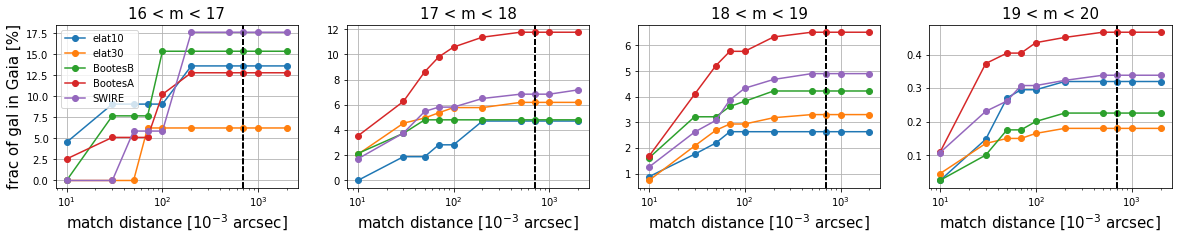

In [154]:
from stack_ancillary import *
from scipy.spatial import cKDTree
# from reduction import *
# data_maps = {1: image_reduction(1), 2: image_reduction(2)}

inst = 1
fig, ax = plt.subplots(1, 4, figsize = (20,3))
for ifield in [4,5,6,7,8]:
    mask_inst1, mask_inst2 = \
    load_processed_images(data_maps, return_names=[(1,ifield,'mask_inst'),(2,ifield,'mask_inst')])

    dfg = pd.read_csv(mypaths['GAIAcatdat'] + fieldnamedict[ifield] + '.csv')
    dfg = dfg[dfg['parallax']==dfg['parallax']]
    catalogg = (dfg[['ra','dec']].values * np.pi/180).tolist()
    psg = [[item[0], item[1]] for item in catalogg]

    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        srcdat = ps_src_select(inst, ifield, m_min, m_max, 
            [mask_inst1, mask_inst2], gaia_match=False, sample_type='all')
        dfp = pd.read_csv(mypaths['PScatdat'] + fieldnamedict[ifield] + '.csv')
        dfp = dfp.iloc[srcdat['idxg_arr']]
        catalogp = (dfp[['ra','dec']].values * np.pi/180).tolist()
        psp = [[item[0], item[1]] for item in catalogp]
        kdt = cKDTree(psg)

        fmatch_arr = []
        tol_mas_arr = [10,30,50,70,100,200,500,700,1000,2000]
        for tol_mas in tol_mas_arr:
            tolerance = (tol_mas * u.mas).to(u.rad).value
            obj = kdt.query_ball_point(psp, tolerance)
            Nmatch = np.array([len(obj_i) for obj_i in obj])
            fmatch_arr.append(np.sum(Nmatch!=0)/len(Nmatch))
        fmatch_arr = np.array(fmatch_arr)
        ax[im].semilogx(tol_mas_arr,fmatch_arr*100,'o-', label=fieldnamedict[ifield])
        ax[im].set_title('%d < m < %d'%(m_min, m_max),fontsize=15)
        ax[im].grid()
        ax[im].set_xlabel(r'match distance [$10^{-3}$ arcsec]',fontsize=15)
        ax[im].axvline(700,c='k',ls='--')
    ax[0].legend(loc=2)
    ax[0].set_ylabel('frac of gal in Gaia [%]',fontsize=15)
plt.savefig('/Users/ytcheng/Desktop/gal_gaia_match.png', dpi = 200, bbox_inches='tight')

In [188]:
from run_fit import *

inst = 1
ifield = 8
im = 3

Re2 = 2.5

filt_order = filt_order_dict[inst]
param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order)
profgal = param_fit.get_profgal_model(Re2=Re2,subbin=False)
galprofdat = gal_profile_model().Wang19_profile(param_fit.rbins, im, Re2=Re2)

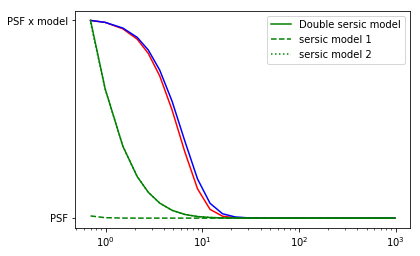

In [190]:
plt.semilogx(param_fit.rbins, profpsf,'r','PSF')
plt.semilogx(param_fit.rbins, profgal,'b','PSF x model')
plt.semilogx(param_fit.rbins, galprofdat['I_arr']/galprofdat['I_arr'][0],'g',label='Double sersic model')
plt.semilogx(param_fit.rbins, galprofdat['I1_arr']/galprofdat['I_arr'][0],'g--',label='sersic model 1')
plt.semilogx(param_fit.rbins, galprofdat['I2_arr']/galprofdat['I_arr'][0],'g:',label='sersic model 2')
plt.legend()

Data:
- Exclude Gaia sources and rerun stacking
- Include star stack - PSF model Error in cov
- Rerun MCMC

Modeling:
- Excess -> excess EBL?
- Magnitude uncertainties. PS(g,r,i,z,y) -> lePHARE SED fitting -> I/H mag
- HSC: xe2 = Re2/R200. R200 from MICECAT. Uncertainty on R200
- Single Sersic?